<font size = 8> Eigen Decomposition

***

## Libraries & Stuff

In [1]:
import numpy as np

In [1]:
import torch

In [ ]:
import tensorflow as tf

In [22]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [18]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [20]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

***

In [2]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])

In [3]:
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [16]:
B = np.array([[1, 0], [0, 1]])

In [35]:
B

array([[1, 0],
       [0, 1]])

In [28]:
N = np.array([[-4, 1], [-8, 2]])

In [36]:
N

array([[-4,  1],
       [-8,  2]])

In [48]:
I = np.array([[1, 0], [0, 1]])

In [49]:
I

array([[1, 0],
       [0, 1]])

In [62]:
J = np.array([[-0.5, 0], [0, 2]])

In [63]:
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [78]:
D = I*2

In [79]:
D

array([[2, 0],
       [0, 2]])

***

***

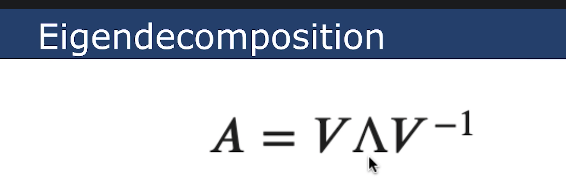

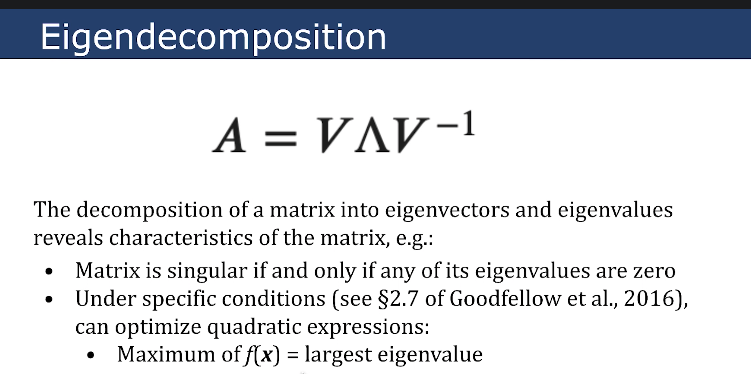

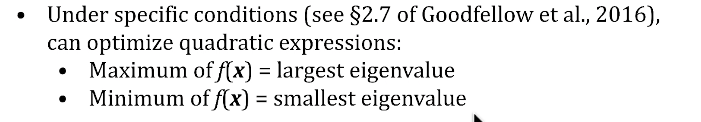

***

***

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [2]:
# V is the concatanation of all the eigenvectors of A

In [3]:
# upper case lambda

In [4]:
# lower case lamda is the vector of eigenvalyes

In [5]:
# primary characteristic?

***

In [6]:
A = np.array([[4, 2], [-5, -3]]) 

In [7]:
A

array([[ 4,  2],
       [-5, -3]])

In [9]:
lambdas, V = np.linalg.eig(A)

In [10]:
lambdas

array([ 2., -1.])

In [11]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [12]:
# first eigen vector

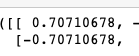

In [13]:
# second eigen vector

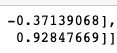

In [14]:
# to get the inverst of V

In [15]:
Vinv = np.linalg.inv(V)

In [16]:
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

***

In [17]:
# to calcylate upper case lambda (diagonal matrix)

In [18]:
Lambda = np.diag(lambdas)

In [32]:
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $A = V \Lambda V^{-1}$: 

In [20]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

In [21]:
# is this the original matrixA?

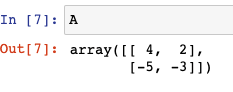

***

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [22]:
# can involve complex numbers (like square root of a negative number)

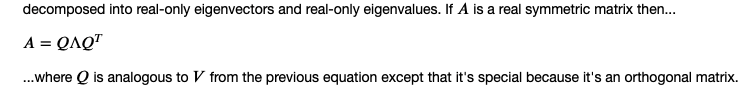

In [23]:
# we can use a transpose intead of an inverse if A is symmetric

***

In [24]:
# creating a symmetric matrix

A = np.array([[2, 1], [1, 2]])

In [25]:
A

array([[2, 1],
       [1, 2]])

In [27]:
# when you flip over the main diagnonal, it is the same matrix

In [28]:
lambdas, Q = np.linalg.eig(A)

In [29]:
lambdas

array([3., 1.])

In [34]:
Lambda = np.diag(lambdas)

In [35]:
Lambda

array([[3., 0.],
       [0., 1.]])

In [30]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

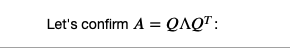

In [36]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

In [37]:
# this is the value of A (the original matrix)

In [38]:
# it is cheap to compute the transpose of a matrix rather than inverse

***

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [39]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [40]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [41]:
# ignore the -2... values -- they are practically 0

***

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])